In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [209]:
data = pd.read_csv("covid_19_data.csv",parse_dates=['Last Update'])
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [210]:
data=data.rename(columns={"ObservationDate":"Date","Country/Region":"Country"})
data

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
...,...,...,...,...,...,...,...,...
7921,7922,03/22/2020,NaN,Jersey,2020-03-17 18:33:03,0,0,0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22 22:43:02,0,1,0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17 21:33:03,0,0,0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19 12:13:38,0,0,0


In [211]:
data.shape

(7926, 8)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926 entries, 0 to 7925
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SNo             7926 non-null   int64         
 1   Date            7926 non-null   object        
 2   Province/State  4493 non-null   object        
 3   Country         7926 non-null   object        
 4   Last Update     7926 non-null   datetime64[ns]
 5   Confirmed       7926 non-null   int64         
 6   Deaths          7926 non-null   int64         
 7   Recovered       7926 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 495.5+ KB


In [213]:
data.isnull().sum()

SNo                  0
Date                 0
Province/State    3433
Country              0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [214]:
df=data.groupby(["Date","Country"]).sum().reset_index()

In [215]:
df

,Date,Country,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,13,0,0,0
1,01/22/2020,Japan,36,2,0,0
2,01/22/2020,Macau,21,1,0,0
3,01/22/2020,Mainland China,535,547,17,28
4,01/22/2020,South Korea,38,1,0,0
...,...,...,...,...,...,...
3934,03/22/2020,Uzbekistan,7799,43,0,0
3935,03/22/2020,Venezuela,7779,70,0,15
3936,03/22/2020,Vietnam,7755,113,0,17
3937,03/22/2020,Zambia,7875,3,0,0


In [216]:
sort_data=df.sort_values("Confirmed", ascending=False)
sort_data=sort_data.drop_duplicates("Country")

In [275]:
sort_data.style.background_gradient(cmap="Greens")

,Date,Country,SNo,Confirmed,Deaths,Recovered
3857,03/22/2020,Mainland China,238980,81060,3261,72252
3838,03/22/2020,Italy,7619,59138,5476,7024
3929,03/22/2020,US,441285,33276,417,178
3911,03/22/2020,Spain,7620,28768,1772,2575
3815,03/22/2020,Germany,7621,24873,94,266
3834,03/22/2020,Iran,7622,21638,1685,7931
3810,03/22/2020,France,70720,16044,674,2200
3910,03/22/2020,South Korea,7625,8897,104,2909
3916,03/22/2020,Switzerland,7626,7245,98,131
3928,03/22/2020,UK,54806,5741,282,67


In [218]:
world_confirmed=sort_data["Confirmed"].sum()
world_Recovered=sort_data["Recovered"].sum()
world_death=sort_data["Deaths"].sum()


In [219]:
active=world_confirmed-world_Recovered-world_death

In [220]:
print("Active cases:-",active)

Active cases:- 223546


In [221]:
Death_rate=world_death*100/world_confirmed
print("Death_rate in World:-",Death_rate)

Death_rate in World:- 4.353984407546272


In [222]:
recovered_rate=world_Recovered*100/world_confirmed
print("recovered_rate in World is :-", recovered_rate)

recovered_rate in World is :- 29.12634648574659


In [223]:
china=sort_data[sort_data["Country"]=="Mainland China"]
china

,Date,Country,SNo,Confirmed,Deaths,Recovered
3857,03/22/2020,Mainland China,238980,81060,3261,72252


In [224]:
china_recoveryrate=int(china["Recovered"].values*100)/int(china["Confirmed"].values)

In [225]:
full_={"Death_rate in World":world_death,"recovered_rate in World is":world_Recovered,"Active cases":world_confirmed}

In [226]:
full_data=pd.DataFrame.from_dict(full_, orient='index' ,columns=['Total'])

In [227]:
china_recoveryrate

89.1339748334567

In [228]:
x=full_data.index
y=full_data["Total"].values

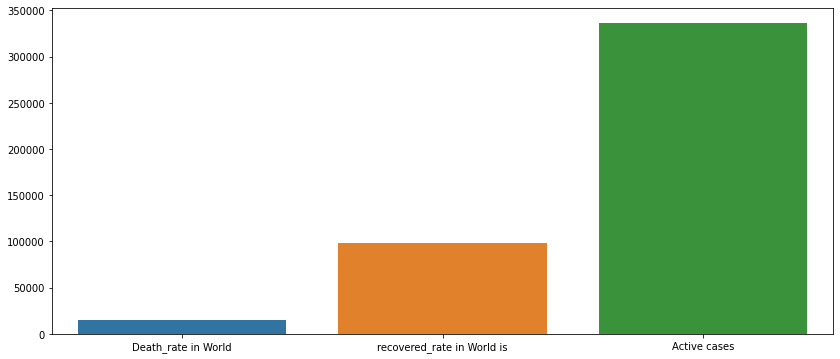

In [229]:
sns.barplot(x,y,order=x)
plt.rcParams["figure.figsize"]=(14,6)

In [230]:
sort_data1=sort_data.head(10)
sort_data1.index


Int64Index([3857, 3838, 3929, 3911, 3815, 3834, 3810, 3910, 3916, 3928], dtype='int64')

In [231]:
y1=sort_data1["Confirmed"]


In [232]:
x1=sort_data1["Country"]
x1

3857    Mainland China
3838             Italy
3929                US
3911             Spain
3815           Germany
3834              Iran
3810            France
3910       South Korea
3916       Switzerland
3928                UK
Name: Country, dtype: object

Text(0.5, 1.0, "'Total Cases / Deaths / Recovered'")

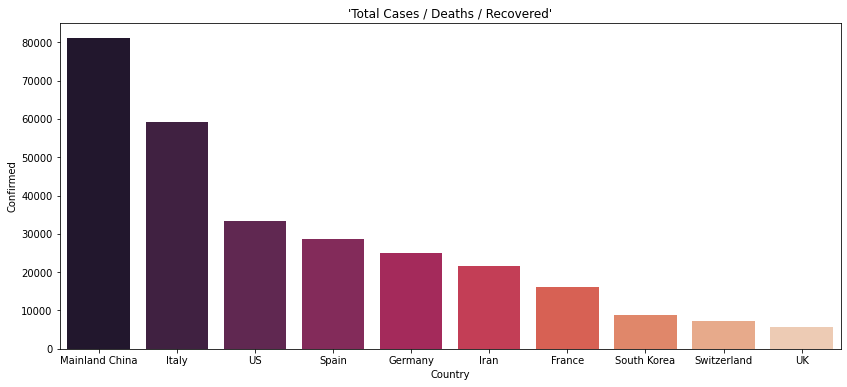

In [233]:
sns.barplot(x1,y1, palette="rocket").set_title("'Total Cases / Deaths / Recovered'")

In [238]:
date=data.groupby(["Date"]).sum().reset_index()

In [240]:
sortby_date=date.sort_values(by="Date",ascending=False)

In [272]:
sortby_date.style.background_gradient(cmap='Reds')

,Date,SNo,Confirmed,Deaths,Recovered
60,03/22/2020,2401548,335957,14634,97882
59,03/21/2020,2269512,304528,12973,91676
58,03/20/2020,2142036,272167,11299,87403
57,03/19/2020,2005602,242713,9867,84962
56,03/18/2020,1868862,214915,8733,83313
55,03/17/2020,1738938,197168,7905,80840
54,03/16/2020,1639208,181546,7126,78088
53,03/15/2020,1486467,167447,6440,76034
52,03/14/2020,1371492,156099,5819,72624
51,03/13/2020,1211755,145193,5404,70251


In [249]:
xx=sortby_date.index

In [258]:
y11=sortby_date.Confirmed
y22=sortby_date.Deaths
y33=sortby_date.Recovered


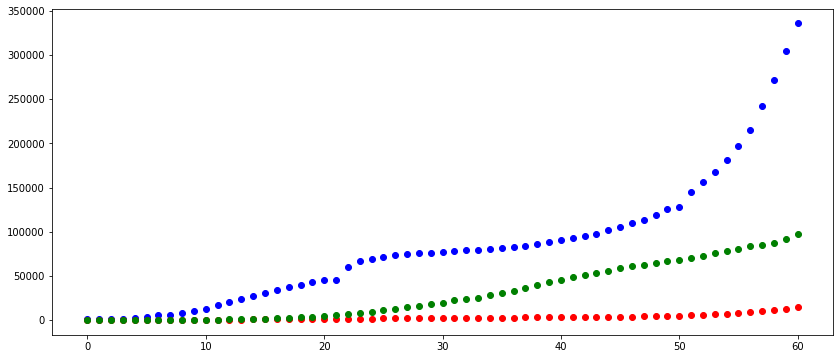

In [264]:
plt.scatter(xx,y11,color="blue",label="confirmed")
plt.scatter(xx,y22,color="red",label="death")
plt.scatter(xx,y33,color="green",label="recovered")
plt.rcParams["figure.figsize"]=(20,6)